# Delivery Duration Prediction of DoorDash orders using Linear Regression

## Problem 
When a customer places an order on DoorDash, the company provides an estimated delivery time. This estimated delivery time is crucial for maintaining customer satisfaction, as accurate predictions help manage expectations and ensure a positive experience. However, predicting delivery times is challenging due to multiple variables involved in the delivery process.

## Objective 
The goal is to build a machine learning model that accurately predicts the total delivery duration (in seconds) for a given order. This involves predicting the time taken from when the customer submits the order (created_at) to when it's delivered to the customer (actual_delivery_time). The model will be trained on historical data, including features like market conditions, restaurant details, and order characteristics.

## Dataset Collection




## Import Packages

In [118]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
import seaborn as sns 

## Loading the Dataset

In [119]:
df = pd.read_csv("historical_data.csv")
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [120]:
df.shape

(197428, 16)

In [121]:
df.dtypes

market_id                                       float64
created_at                                       object
actual_delivery_time                             object
store_id                                          int64
store_primary_category                           object
order_protocol                                  float64
total_items                                       int64
subtotal                                          int64
num_distinct_items                                int64
min_item_price                                    int64
max_item_price                                    int64
total_onshift_dashers                           float64
total_busy_dashers                              float64
total_outstanding_orders                        float64
estimated_order_place_duration                    int64
estimated_store_to_consumer_driving_duration    float64
dtype: object

In [122]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')

## Data Preprocessing and Feature Engineering

We seen that "created_at" and "actual_delivery_time" columns are in objects. We need to convert these to timestamps. 

In [123]:
df["created_at"] = pd.to_datetime(df["created_at"], utc=True)
df["actual_delivery_time"] = pd.to_datetime(df["actual_delivery_time"], utc=True)

In [124]:
print(df["created_at"].dtypes)
print(df["actual_delivery_time"].dtypes)

datetime64[ns, UTC]
datetime64[ns, UTC]


Our target variable is the total delivery duration in seconds. This is the value that trying to predict using the other features in the dataset.

In [125]:
df["total_delivery_duration"] = (df["actual_delivery_time"] -  df["created_at"]).dt.total_seconds()
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_delivery_duration
0,1.0,2015-02-06 22:24:17+00:00,2015-02-06 23:27:16+00:00,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25+00:00,2015-02-10 22:56:29+00:00,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,2015-01-22 20:39:28+00:00,2015-01-22 21:09:09+00:00,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3.0,2015-02-03 21:21:45+00:00,2015-02-03 22:13:00+00:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3.0,2015-02-15 02:40:36+00:00,2015-02-15 03:20:26+00:00,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0


### Missing Values

In [126]:
df.isnull().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
total_delivery_duration                             7
dtype: int64

We see that total delivery duration columns have missing values because we cannot calcuate the target variable. So we should remove it. 

In [127]:
df.dropna(subset=["actual_delivery_time", "total_delivery_duration"], inplace=True)
df.isnull().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                0
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
total_delivery_duration                             0
dtype: int64

In [128]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

market_id                                       0.499947
created_at                                      0.000000
actual_delivery_time                            0.000000
store_id                                        0.000000
store_primary_category                          2.411091
order_protocol                                  0.503999
total_items                                     0.000000
subtotal                                        0.000000
num_distinct_items                              0.000000
min_item_price                                  0.000000
max_item_price                                  0.000000
total_onshift_dashers                           8.237219
total_busy_dashers                              8.237219
total_outstanding_orders                        8.237219
estimated_order_place_duration                  0.000000
estimated_store_to_consumer_driving_duration    0.266436
total_delivery_duration                         0.000000
dtype: float64


Using impute since the percentage of missing value is relatively low, and removing rows would result in significant data loss. 

In [129]:
median_imputer = SimpleImputer(strategy='median')
median_columns = ['total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 
                  'estimated_store_to_consumer_driving_duration']

df[median_columns] = median_imputer.fit_transform(df[median_columns])

mode_imputer = SimpleImputer(strategy='most_frequent')
mode_columns = ['market_id', 'order_protocol']

df[mode_columns] = mode_imputer.fit_transform(df[mode_columns])

df['store_primary_category'].fillna('Unknown', inplace=True)

print(df.isnull().sum())


market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_id                                        0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_order_place_duration                  0
estimated_store_to_consumer_driving_duration    0
total_delivery_duration                         0
dtype: int64


### Extract Date and Time features

In [130]:
df[""] = df["created_hour"] = df["created_at"].dt.hour
df["created_day"] = df["created_at"].dt.day
df["created_month"] = df["created_at"].dt.month
df["created_day_of_week"] = df["created_at"].dt.day_of_week
df["created_is_weekend"] = df["created_at"].dt.dayofweek >= 5

df['delivery_hour'] = df['actual_delivery_time'].dt.hour
df['delivery_day'] = df['actual_delivery_time'].dt.day
df['delivery_month'] = df['actual_delivery_time'].dt.month
df['delivery_day_of_week'] = df['actual_delivery_time'].dt.dayofweek
df['delivery_is_weekend'] = df['actual_delivery_time'].dt.dayofweek >= 5



### Encode Categorical Variables

In [131]:
categorical_cols = ["store_primary_category", "order_protocol"]

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

I need to change the data types due to boolean (True/False) instead of (0 and 1) from dummies variables. 

In [132]:
boolean_columns = df.select_dtypes(include=['bool']).columns
df[boolean_columns] = df[boolean_columns].astype(int)

In [133]:
df[boolean_columns].head()

,created_is_weekend,delivery_is_weekend,store_primary_category_afghan,store_primary_category_african,store_primary_category_alcohol,store_primary_category_alcohol-plus-food,store_primary_category_american,store_primary_category_argentine,store_primary_category_asian,store_primary_category_barbecue,...,store_primary_category_turkish,store_primary_category_vegan,store_primary_category_vegetarian,store_primary_category_vietnamese,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Feature Scaling

In [134]:
numerical_cols = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 
                  'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 
                  'estimated_order_place_duration', 'estimated_store_to_consumer_driving_duration']

scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [135]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,...,store_primary_category_turkish,store_primary_category_vegan,store_primary_category_vegetarian,store_primary_category_vietnamese,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0
0,1.0,2015-02-06 22:24:17+00:00,2015-02-06 23:27:16+00:00,1845,0.301376,0.416144,0.815344,-0.247536,0.142205,-0.336839,...,0,0,0,0,0,0,0,0,0,0
1,2.0,2015-02-10 21:49:25+00:00,2015-02-10 22:56:29+00:00,5477,-0.823675,-0.429118,-1.024857,1.367274,0.430521,-1.302356,...,0,0,0,0,1,0,0,0,0,0
2,3.0,2015-01-22 20:39:28+00:00,2015-01-22 21:09:09+00:00,5477,-0.823675,-0.429118,-1.024857,2.325050,1.325913,-1.302356,...,0,0,0,0,0,0,0,0,0,0
3,3.0,2015-02-03 21:21:45+00:00,2015-02-03 22:13:00+00:00,5477,1.051410,2.313460,1.428744,-0.165168,1.146835,-1.302356,...,0,0,0,0,0,0,0,0,0,0
4,3.0,2015-02-15 02:40:36+00:00,2015-02-15 03:20:26+00:00,5477,-0.073641,0.667913,0.201944,0.792608,0.788678,-1.151494,...,0,0,0,0,0,0,0,0,0,0


## Split the Data into Training and Testing Sets

In [136]:
X = df.drop(columns=["total_delivery_duration"])
y = df["total_delivery_duration"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Selection

When working with Linear Regression, is important to know the key assumptions of the model. 

Assumptions of Linear Regression:
1. **Linearity**: The relationship between predictors and the target variable should be linear. 
2. **Independence**: Observations should be independent of each other. 
3. **Homoscedasticity**: The residuals (differences between observed and predicted values) should have constant variance. 
4. **Normal Distribution of Errors**: The residuals should be approximately normally distributed. 
5. **No Multicollinearity**: Predictors should not be highly correlated with each other. 

1. Linearity

- Check with Plots: Plotting scatter plots between the predictors and the target variable can give you a visual indication of linearity.
- Residuals vs. Predicted Plot: Residuals should not show patterns when plotted against fitted values.

In [137]:
if 'created_at' in X_train.columns:
    X_train = X_train.drop(columns=['created_at'])
if 'actual_delivery_time' in X_train.columns:
    X_train = X_train.drop(columns=['actual_delivery_time'])

if 'created_at' in X_test.columns:
    X_test = X_test.drop(columns=['created_at'])
if 'actual_delivery_time' in X_test.columns:
    X_test = X_test.drop(columns=['actual_delivery_time'])


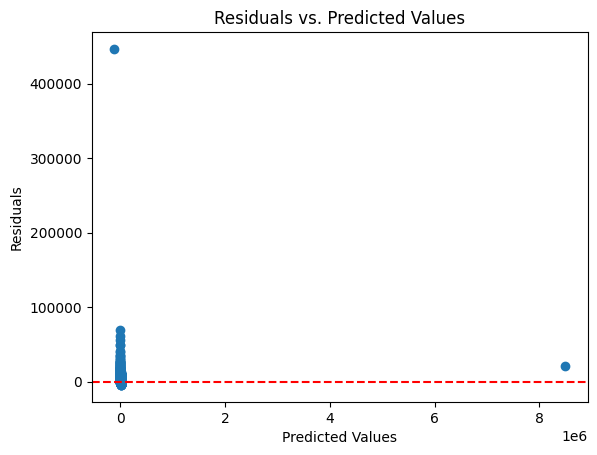

In [138]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_train = linear_model.predict(X_train)

residuals = y_train - y_pred_train 

plt.scatter(y_pred_train, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.axhline(y=0, color="red", linestyle="--")
plt.show()

We see an outliers far left with a very high residual that stand out significantly from the rest. This indicates that for this particular prediction, the model was off by a large margin

In [139]:
df["abs_residuals"] = abs(residuals)
outlier_candidates = df.sort_values(by="abs_residuals", ascending=False).head()
print(outlier_candidates)


        market_id                created_at      actual_delivery_time  \
27189         1.0 2015-02-16 02:24:09+00:00 2015-02-19 22:45:31+00:00   
190860        1.0 2015-02-16 02:31:05+00:00 2015-02-16 17:38:32+00:00   
86952         3.0 2015-02-05 02:11:40+00:00 2015-02-05 15:34:38+00:00   
76743         2.0 2015-02-15 04:17:35+00:00 2015-02-15 16:59:00+00:00   
105825        2.0 2015-02-08 04:07:51+00:00 2015-02-08 15:03:43+00:00   

        store_id  total_items  subtotal  num_distinct_items  min_item_price  \
27189       4338     0.301376  1.260310            0.815344        0.591475   
190860      2169     0.301376  0.536269            0.815344       -0.596167   
86952       1764    -0.073641 -0.272791            0.201944       -0.366301   
76743       3247    -0.823675 -0.928268           -1.024857        0.208365   
105825      3305    -0.073641  0.091972            0.201944       -0.931388   

        max_item_price  total_onshift_dashers  ...  \
27189         1.137881          

C:\Users\Wen\AppData\Local\Temp\ipykernel_11236\641558792.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["abs_residuals"] = abs(residuals)


- Row 27189: The delivery took almost 4 days, which is highly unusual and likely an outlier. This could be due to incorrect data entry, a rare event, or an operational issue. 
- Other Rows: All have delivery durations that are longer than typical, stretching over several hours, which might not be expected under normal operational conditions.

In [145]:
Q1 = df['total_delivery_duration'].quantile(0.25)
Q3 = df['total_delivery_duration'].quantile(0.75)
IQR = Q3 - Q1

# Defining outliers as those outside of Q1 - 1.5*IQR and Q3 + 1.5*IQR
df = df[(df['total_delivery_duration'] > (Q1 - 1.5 * IQR)) & (df['total_delivery_duration'] < (Q3 + 1.5 * IQR))]


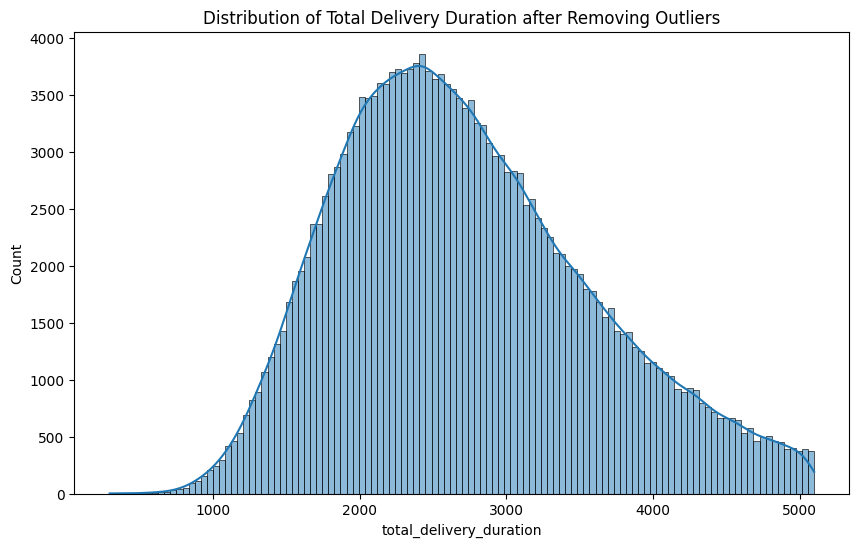

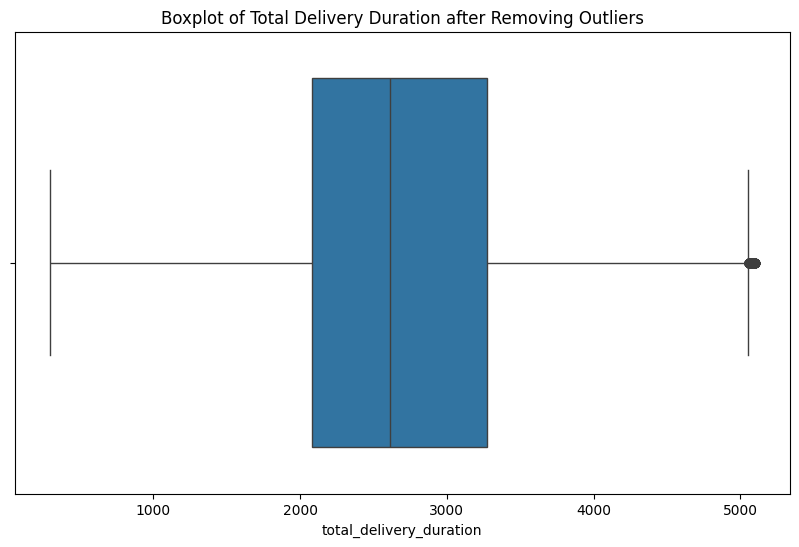

In [146]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['total_delivery_duration'], kde=True)
plt.title('Distribution of Total Delivery Duration after Removing Outliers')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['total_delivery_duration'])
plt.title('Boxplot of Total Delivery Duration after Removing Outliers')
plt.show()


In [ ]:
df.dropna(df)

In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

# Plot residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.axhline(y=0, color="red", linestyle="--")
plt.show()


ValueError: Input contains NaN

In [153]:
df.isnull().sum()

market_id                          0
created_at                         0
actual_delivery_time               0
store_id                           0
total_items                        0
                               ...  
order_protocol_5.0                 0
order_protocol_6.0                 0
order_protocol_7.0                 0
abs_residuals                  37969
log_total_delivery_duration        0
Length: 108, dtype: int64

## Model Evaluation